In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


C:\Users\sethi\AppData\Local\Temp\ipykernel_22368\2304490347.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Collection and processing

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


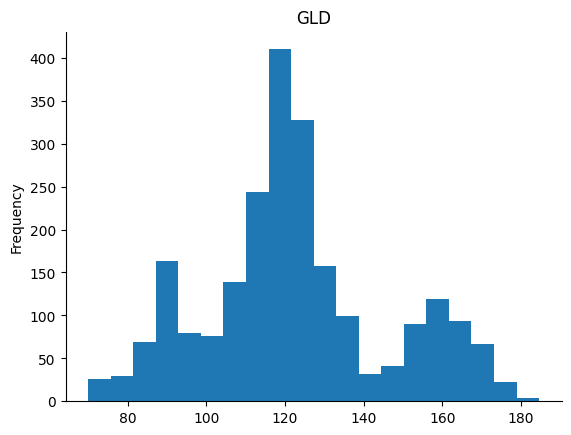

In [4]:

gold_data['GLD'].plot(kind='hist', bins=20, title='GLD')
plt.gca().spines[['top', 'right',]].set_visible(False)

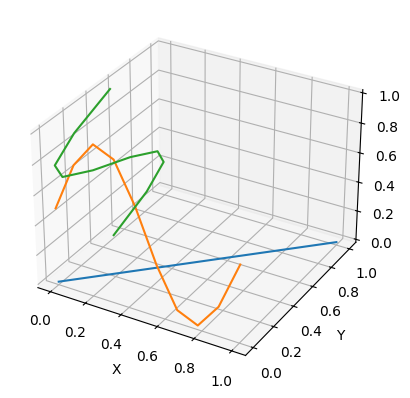

In [5]:

from mpl_toolkits.mplot3d import Axes3D

# Load 2D image data into NumPy arrays
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
z = np.sin(x * 2 * np.pi) / 2 + 0.5

# Create 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot 2D data on 3D axes
ax.plot(x, y, zs=0, zdir='z')
ax.plot(x, z, zs=0, zdir='y')
ax.plot(z, y, zs=0, zdir='x')

# Set labels and show plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [6]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [7]:
# getting basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Find the correlation:

In [10]:
correlation = gold_data.drop(columns = ['Date']).corr()

<Axes: >

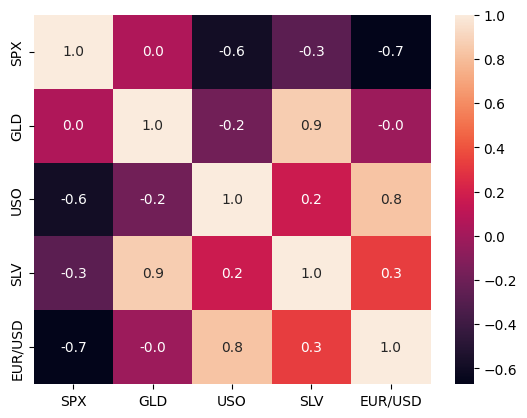

In [11]:
sns.heatmap(correlation,annot = True,cbar = True,fmt = '.1f')

In [12]:
# correlation values of gld
print(gold_data.drop(columns = ['Date']).corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sethi\AppData\Local\Temp\ipykernel_22368\234377077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

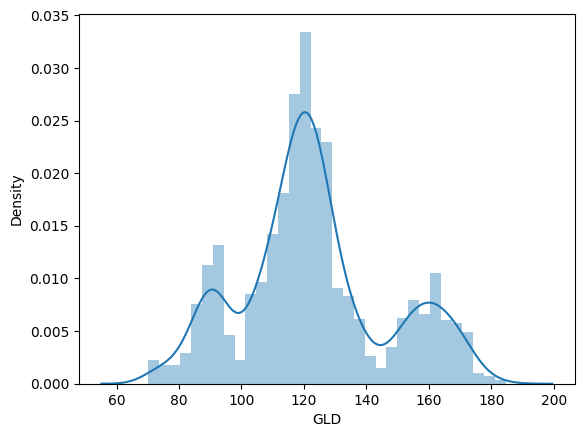

In [13]:
sns.distplot(gold_data['GLD'])

# Splitting the feautures and Target

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.2)

In [16]:
X_test

,SPX,USO,SLV,EUR/USD
2178,2602.419922,11.790000,16.080000,1.185396
1271,1752.069946,34.990002,21.870001,1.380396
1268,1744.660034,35.939999,21.410000,1.367596
44,1304.339966,83.889999,20.075001,1.538509
2025,2381.919922,11.170000,16.799999,1.053585
...,...,...,...,...
1872,2000.540039,11.190000,16.870001,1.101503
1075,1415.949951,32.169998,33.130001,1.295337
299,888.330017,33.380001,14.340000,1.400305
306,942.460022,37.689999,15.630000,1.397194


In [17]:
X_train

,SPX,USO,SLV,EUR/USD
1018,1413.489990,36.220001,28.920000,1.253447
1870,2085.449951,11.740000,16.420000,1.132824
118,1245.359985,109.250000,18.545000,1.585590
220,805.219971,28.660000,11.090000,1.288494
2053,2328.949951,11.130000,17.530001,1.061639
...,...,...,...,...
1638,2095.840088,19.660000,15.480000,1.120787
1095,1426.189941,33.369999,29.370001,1.322769
1130,1502.420044,33.430000,27.730000,1.327316
1294,1807.229980,33.189999,18.959999,1.356779


# Modal training: RandomForestRegressor

In [18]:
regressor = RandomForestRegressor(n_estimators = 100)


In [19]:
# fitting the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[122.44009963 129.92820256 127.66649979  96.64299725 118.54320067
 114.41629916 125.00340083 117.70109932 107.97170118  98.39829997
  95.65839928 167.57939807 149.18330064 116.10710029 170.50610165
  84.94939986 123.17479882 108.93289718 113.26580035 131.39690341
 124.28919886 113.66940068 115.6893004  108.67489954 108.56130133
 125.8172991  118.17739968 112.28229909 113.54390146 125.44309879
 146.28260236  89.60430004 168.03169971 113.58049961 108.38100104
 120.23710111 142.11079834 161.06830119 173.84829848 153.26060156
 119.07900103 113.5758009  121.37139946 113.74609948 122.06680015
 107.93350078  88.44499898 114.55999906 129.62560227 118.07450105
 104.06199972 129.6122023  107.10649866 160.77350348 132.02629994
 118.18809958 146.77000083 134.97360282  95.46450116 124.63140173
 115.76629855  86.46360095 104.28359898 113.87090113  84.19499933
 122.32730047 116.61339905 113.46390192 164.88480357  92.44650003
  80.33530074 160.87210073 158.74720273 106.39039979 150.31520084
 109.68869

# Model Evaluation

In [22]:
# R squared error
error_score  =metrics.r2_score(y_test,test_data_prediction)

In [23]:
print(" R squared error: ", error_score)

 R squared error:  0.988681731183994


# compare the actual value and predicted value

In [24]:
y_test = list(y_test)

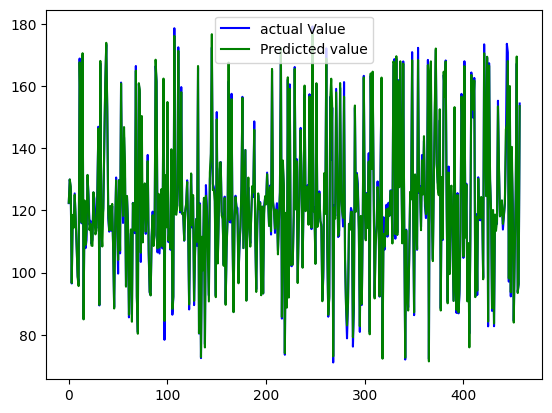

In [25]:
plt.plot(y_test,color = "blue", label = "actual Value")
plt.plot(test_data_prediction, color = "green", label = "Predicted value")
plt.legend()
plt.show()

In [26]:
import pickle

In [27]:
with open('regressor.pkl', 'wb') as f:
    pickle.dump(regressor, f)